In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

# Data-preprocessing

In [2]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/Titanic/train.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.Age.fillna(df.Age.median(), inplace=True)

In [7]:
columns = ['Pclass','Sex','Age','SibSp','Parch']
df_trim_features = df[columns] 
df_trim_features.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [8]:
df_dum_features = pd.get_dummies(df_trim_features, columns=['Pclass','Sex'])
df_dum_features.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,1,0,0,0,1,0,1
1,38.0,1,0,1,0,0,1,0
2,26.0,0,0,0,0,1,1,0
3,35.0,1,0,1,0,0,1,0
4,35.0,0,0,0,0,1,0,1


In [9]:
df_label = df['Survived'].values
df_label[0:5]

array([0, 1, 1, 1, 0])

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_feat_trans = scaler.fit(df_dum_features).transform(df_dum_features)
df_feat_trans

array([[ 0.27117366,  0.125     ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.4722292 ,  0.125     ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.32143755,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ..., 
       [ 0.34656949,  0.125     ,  0.33333333, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.32143755,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.39683338,  0.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

# Model fit：這題是binary classification

## naive_bayes.GaussianNB()

In [44]:
from sklearn import naive_bayes, cross_validation

#cross_validation先分割
X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feat_trans, df_label,
                                                                  test_size=0.25, random_state=0,stratify=df_label)

#跑模型
cls=naive_bayes.GaussianNB()
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test,y_test))

Training Score: 0.81
Testing Score: 0.78


## svm.LinearSVC(C=?)

In [53]:
from sklearn import svm, cross_validation

X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feat_trans, df_label,
                                                                  test_size=0.25, random_state=0,stratify=df_label)

cls = svm.LinearSVC(C=0.1)
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test,y_test))

Training Score: 0.80
Testing Score: 0.79


## DecisionTreeClassifier(max_depth=?)

In [97]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feat_trans, df_label,
                                                                  test_size=0.25, random_state=0,stratify=df_label)

depth=20
cls = DecisionTreeClassifier(max_depth=depth)
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test,y_test))

Training Score: 0.92
Testing Score: 0.80


# Decomposition: ex. PCA, n_components=3

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(df_feat_trans)
df_feat_trans = pca.transform(df_feat_trans)

from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feat_trans, df_label,
                                                                  test_size=0.25, random_state=0,stratify=df_label)

depth=20
cls = DecisionTreeClassifier(max_depth=depth)
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test,y_test))

Training Score: 0.92
Testing Score: 0.81


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
df_feat_trans

array([[-0.69451851, -0.27322001, -0.03863297],
       [ 1.15559487,  0.26831692, -0.59764166],
       [ 0.56547083, -0.89619127, -0.04249587],
       ..., 
       [ 0.58119951, -0.91038539, -0.04318596],
       [-0.10899021,  0.89083439, -0.5871687 ],
       [-0.69466314, -0.2561515 , -0.04564644]])

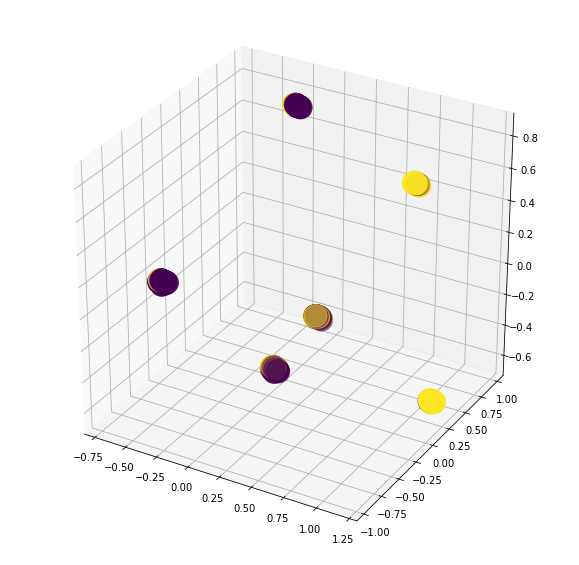

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df_feat_trans[:,0],ys=df_feat_trans[:,1],zs=df_feat_trans[:,2], 
           c=df_label, s=500, alpha=0.5, #cmap=plt.cm.get_cmap('nipy_spectral', 10)
           )
plt.show()

# Classification_matrics

In [64]:
from sklearn import svm, cross_validation

X_train,X_test,y_train,y_test = cross_validation.train_test_split(df_feat_trans, df_label,
                                                                  test_size=0.25, random_state=0,stratify=df_label)

cls = svm.LinearSVC(C=0.1)
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test,y_test))

y_pred = cls.predict(X_test) #獲取預測答案
y_pred

Training Score: 0.79
Testing Score: 0.77


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

y_true = y_test
conf = confusion_matrix(y_true,y_pred)
conf

array([[115,  22],
       [ 29,  57]])

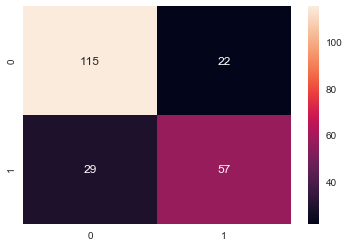

In [123]:
sns.heatmap(conf, annot=True, fmt="d")
plt.show()

In [77]:
print(classification_report(y_true,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       137
          1       0.72      0.66      0.69        86

avg / total       0.77      0.77      0.77       223



# Summary

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#清洗數據
def data_preprocessing(df):
    df.Age.fillna(df.Age.median(), inplace=True)
    columns = ['Pclass','Sex','Age','SibSp','Parch']
    df_trim_features = df[columns] 
    df_dum_features = pd.get_dummies(df_trim_features, columns=['Pclass','Sex'])
    
    scaler = MinMaxScaler(feature_range=(0,1))
    df_feat_trans = scaler.fit(df_dum_features).transform(df_dum_features)
    
    return df_feat_trans

#訓練
filepath = '/Users/mac/Desktop/Kaggle_datasets/Titanic/train.csv'
df = pd.read_csv(filepath)
df_label = df['Survived'].values

X_train,X_test,y_train,y_test = cross_validation.train_test_split(data_preprocessing(df), df_label,
                                                                  test_size=0.25, random_state=0,stratify=df_label)

cls = svm.LinearSVC(C=0.1)
cls.fit(X_train,y_train)
print('Training Score: %.2f' % cls.score(X_train,y_train))
print('Testing Score: %.2f' % cls.score(X_test,y_test))

#測驗
filepath = '/Users/mac/Desktop/Kaggle_datasets/Titanic/test.csv'
df = pd.read_csv(filepath)

X_test_ = data_preprocessing(df)
y_pred_ = cls.predict(X_test_)

Training Score: 0.80
Testing Score: 0.79


In [82]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/Titanic/gender_submission.csv'
df = pd.read_csv(filepath)
df['Survived'] = y_pred_
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [87]:
df.to_csv('answer.csv', index_label='PassengerId')